In [1]:
#import pyFAI
#import pyFAI.calibrant
#import pyFAI.detectors
import os, glob, re
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox
import ipywidgets as widgets
# from tifffile import imread, imshow, imsave
from skimage.io import imread, imshow, imsave
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
from matplotlib.widgets import Slider, Button
import yaml, tifffile
%matplotlib widget

In [2]:
plt.close('all')

In [3]:
# tiff_base_path = ('/Volumes/Data/2024-2/CdTe_TC_05_21_2024/tiff_base/MA_Empty_30Kapton_1pixel_offset/')
# tiff_base_path = ('E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/A_emptykapton_Pilatus//')
tiff_base_path = '/Users/cheng-hunglin/Documents/Kwon_2025Nov_316338_2a307d50/tiff_base/A_Air-1/'
# use_mask_1 = np.load("E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/Milinda_mask/Mask_pos1_ext_BS.npy") # This is mask we are applying befor mergin images
# use_mask_2 = np.load("E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/Milinda_mask/Mask_pos2_ext_BS.npy") # This is mask we are applying befor mergin images
# use_mask_3 = np.load("E:/1-Beamtime/2024-3/user_data_Kwon_PE_Pilatus_315007_a5e3fe1a_2024-11-18-0844/tiff_base/Milinda_mask/Mask_pos3_ext_BS.npy") # This is mask we are applying befor mergin images

use_mask_1 = np.load('/Users/cheng-hunglin/Documents/Git_2025_MAC/Data_process/20251113_pilatus_stitch/Mask_pos1_ext_BS.npy') # This is mask we are applying befor mergin images
use_mask_2 = np.load('/Users/cheng-hunglin/Documents/Git_2025_MAC/Data_process/20251113_pilatus_stitch/Mask_pos3_ext_BS.npy') # This is mask we are applying befor mergin images
use_mask_3 = np.load('/Users/cheng-hunglin/Documents/Git_2025_MAC/Data_process/20251113_pilatus_stitch/Mask_pos2_ext_BS.npy') # This is mask we are applying befor mergin images

# tiff_base_path = ('E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/tiff_base/A_Air-1//')

# use_mask_1 = np.load("E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/Mask_pos1_ext_BS.npy") # This is mask we are applying befor mergin images
# use_mask_2 = np.load("E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/Mask_pos2_ext_BS.npy") # This is mask we are applying befor mergin images
# use_mask_3 = np.load("E:/1-Beamtime/2025-3/Kwon_2025Nov_316338_2a307d50/Mask_pos3_ext_BS.npy")



data_dir = tiff_base_path + "dark_sub"
meta_dir = tiff_base_path + "meta/"

Data = []
os.chdir(data_dir)
Tiff, Meta = [], []
total_num_img = 0
for file in os.listdir(data_dir):
    if file.endswith(".tiff"):
        Tiff.append(file)
        total_num_img = file
#A.sort(key=lambda x: os.path.getmtime(x))
for file in os.listdir(meta_dir):
    if file.endswith(".yaml"):
        Meta.append(file)
Tiff.sort()
Meta.sort()
Tiff

num_img = len(Tiff)
print("total number of images = ", num_img)

total number of images =  30


In [4]:
def sum_everything(my_im1, my_im2, my_im3, use_mask_1, use_mask_2, use_mask_3, osetx = 27, osety = 27):
    """ Assuming im2 offset by -osetx, -osety, and im3 offset by +osetx, +osety """
    
    my_imsum = np.ones((my_im1.shape[0]+int(2*osetx), my_im2.shape[1]+int(2*osety),3))*np.nan
    my_imsum2 = np.ones((my_im1.shape[0]+int(2*osetx), my_im2.shape[1]+int(2*osety),3))*np.nan

    my_imsum[osetx:-osetx,osety:-osety,0] = my_im1
    my_imsum[osetx:-osetx,osety:-osety,0][use_mask_1==1] = np.nan
    # my_imsum[osetx:-osetx,osety:-osety,0][my_im1<=-1] = np.nan

    my_imsum[:-int(2*osetx),:-int(2*osety):,1] = my_im2
    my_imsum[:-int(2*osetx),:-int(2*osety):,1][use_mask_2==1] = np.nan
    # my_imsum[:-int(2*osetx),:-int(2*osety):,1][my_im2<=-1] = np.nan

    my_imsum[int(2*osetx):,int(2*osety):,2] = my_im3
    my_imsum[int(2*osetx):,int(2*osety):,2][use_mask_3==1] = np.nan
    # my_imsum[int(2*osetx):,int(2*osety):,2][my_im3<=-1] = np.nan

    # for i in range(my_imsum.shape[2]):
    #     my_imsum2[:, :, i] = my_imsum[:, :, i] / np.nanmean(my_imsum[:, :, i])

    return np.nanmean(my_imsum,axis=2)

A_Air-1_20251102-091312_9ddd10_pilatus-1_pos0-dk_sub_image-00000.tiff
A_Air-1_20251102-091312_9ddd10_pilatus-1_pos1-dk_sub_image-00000.tiff
A_Air-1_20251102-091312_9ddd10_pilatus-1_pos2-dk_sub_image-00000.tiff
im_spotA.shape = (1679, 1475)
im_spotB.shape = (1679, 1475)
im_spotC.shape = (1679, 1475)
(1733, 1529)


/var/folders/kc/f1xlt7nd0y31y5wrd0dhhnw80000gp/T/ipykernel_3255/425867942.py:22: RuntimeWarning: Mean of empty slice
  return np.nanmean(my_imsum,axis=2)


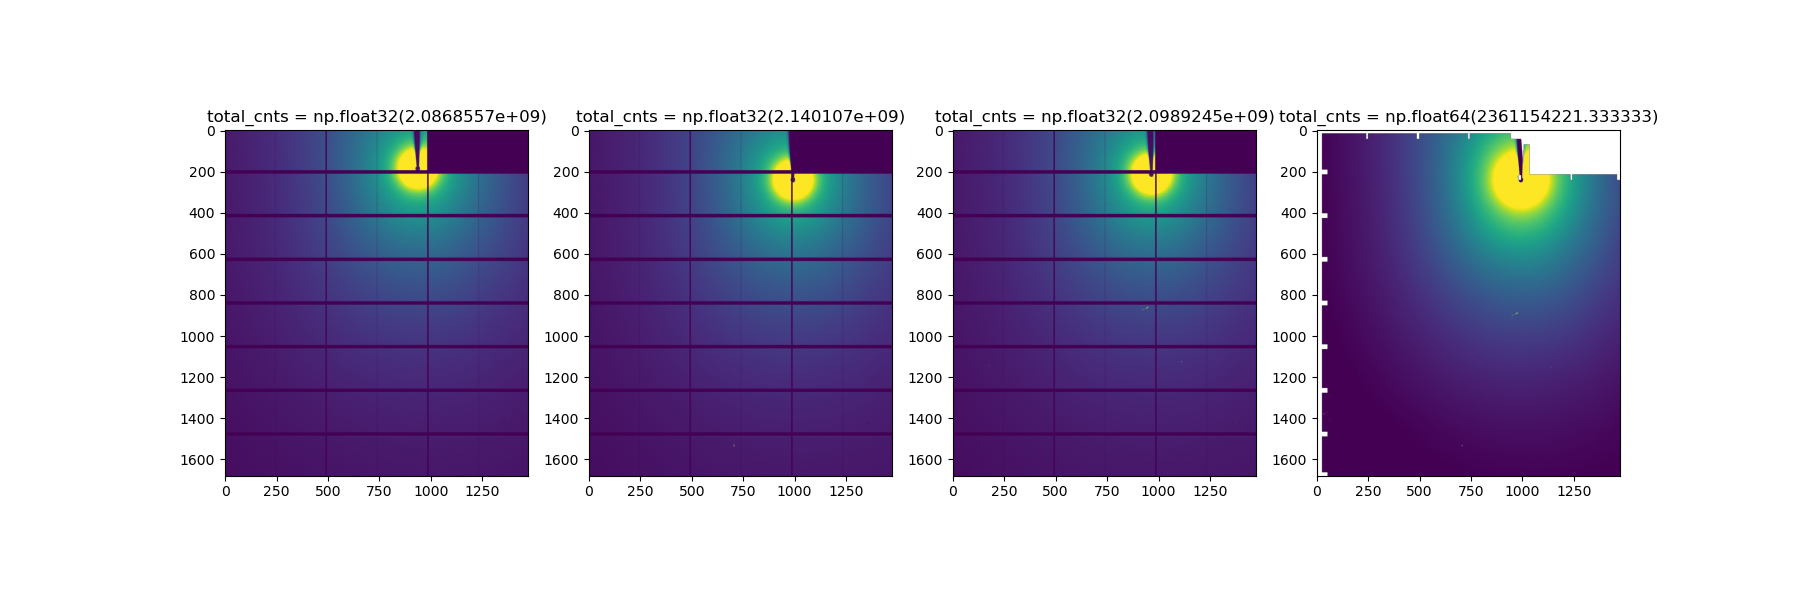

In [5]:
# for j in range (0, num_img, 3):
for j in range (0, 1, 3):

    print(Tiff[j+0])
    print(Tiff[j+1])
    print(Tiff[j+2])

    
    im_spotA = imread(Tiff[j+0]) #012,120,102,201,210
    im_spotB = imread(Tiff[j+1])
    im_spotC = imread(Tiff[j+2])

    #im_spotD = imread(Tiff[j+0]) #012,120,102,201,210
    #im_spotE = imread(Tiff[j+1])
    #im_spotF = imread(Tiff[j+2])

    # with open(meta_dir + Meta[j+0], 'r') as f:
    #     meta_spotA = yaml.unsafe_load(f)
    # with open(meta_dir + Meta[j+1], 'r') as f1:
    #     meta_spotB =  yaml.unsafe_load(f1)
    # with open(meta_dir + Meta[j+2], 'r') as f2:
    #     meta_spotC = yaml.unsafe_load(f2)

    print (f"{im_spotA.shape = }")
    print (f"{im_spotB.shape = }")
    print (f"{im_spotC.shape = }")

    # full_imsum = sum_everything(im_spotA, im_spotB, im_spotC, use_mask_1, use_mask_2, use_mask_3, osetx=offset, osety=offset)
    ## Update the stithcing order because of re-mounting Pilatus after returning from HEX (by CHL on 2025/11/13)
    full_imsum = sum_everything(im_spotC, im_spotB, im_spotA, use_mask_3, use_mask_2, use_mask_1,)


    v = [50, 5000]
    
    plt.figure(figsize=(18,6))
    ax1 = plt.subplot(141)
    plt.imshow(im_spotA,vmin=v[0],vmax=v[1])
    total_cnts = np.nansum(im_spotA)
    plt.title(f'{total_cnts = }')

    
    plt.subplot(142,sharex=ax1, sharey=ax1)
    plt.imshow(im_spotB,vmin=v[0],vmax=v[1])
    total_cnts = np.nansum(im_spotB)
    plt.title(f'{total_cnts = }')

    
    plt.subplot(143,sharex=ax1, sharey=ax1)
    plt.imshow(im_spotC,vmin=v[0],vmax=v[1])
    total_cnts = np.nansum(im_spotC)
    plt.title(f'{total_cnts = }')
    
    plt.subplot(144,sharex=ax1, sharey=ax1)
    vmin = np.nanpercentile(full_imsum, 10)
    vmax = np.nanpercentile(full_imsum, 98)
    plt.imshow(full_imsum[0:1679, 0:1475],vmin=vmin,vmax=vmax)
    total_cnts = np.nansum(full_imsum)
    plt.title(f'{total_cnts = }')
    
    #tifffile.imsave(data_dir + 'sum.tiff', full_imsum)
    print(np.shape(full_imsum))
    # imshow(full_imsum[0:1679, 0:1475],vmin=0,vmax=3000)
    f1 = j+1
    f2 = j+3
    
    File_Name_Prefix = os.path.basename(tiff_base_path.rstrip('/'))
    key = 'pilatus'
    key_index = Tiff[j+0].find(key)
    fn = os.path.join(tiff_base_path, f'{Tiff[0][:31+len(key)]}_sum.tiff')
    imsave(fn, full_imsum)
    # imsave(f"{File_Name_Prefix}" + str(f1) + "-" + str(f2) +"_sum.tiff", full_imsum)

In [6]:
type(full_imsum[0,0])

numpy.float64